## **Final Project** - House Prices Advanced Regression Techniques
* June 27°, 2024
#### ESCOM - IPN: *Data Mining*
#### Dra. Fabiola Ocampo Botello

> Villagran Salazar Diego

#### **0° Introduction**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

> Anna Montoya, DataCanary. (2016). House Prices - Advanced Regression Techniques. Kaggle. https://kaggle.com/competitions/house-prices-advanced-regression-techniques

In this notebook we are going to use **four different types or regression:** 
* Linear Regression w/ OLS *(Ordinary Least Squared)*
* 2° Degree OLS Regression
* 3° Degree OLS Regression
* Random Forest (Tensorflow)


* First of all, we need to **import** all the **libraries** we are going to use

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder


#### **1° Data Cleaning**

* We **import** the **data** 

In [38]:
house_prices_df = pd.read_csv('house_prices.csv')

house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* We drop the **Id** column, it is not necessary

In [39]:
house_prices_df.drop('Id', axis=1, inplace=True)

house_prices_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* Let's check some **important information** about the dataset

In [40]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

> We can see that each feature has many **Null** values

In [41]:
house_prices_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* For all numerical features, **fill null values with 0**

In [42]:
# Fill missing values with 0 only in the numerical columns
numerical_cols = house_prices_df.select_dtypes(include=['int64', 'float64']).columns
house_prices_df[numerical_cols] = house_prices_df[numerical_cols].fillna(0)

house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

* For all categorical features, we use a **Ordinal Encoder** to make all int64 and float64 datatypes

In [43]:
# Instantiate the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fill and transform the categorical columns
categorical_cols = house_prices_df.select_dtypes(include=['object']).columns

# ENcode the categorical columns
house_prices_df[categorical_cols] = ordinal_encoder.fit_transform(house_prices_df[categorical_cols])

# Fill missing values with -1 in all the columns
house_prices_df = house_prices_df.fillna(-1)

house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   float64
 5   Alley          1460 non-null   float64
 6   LotShape       1460 non-null   float64
 7   LandContour    1460 non-null   float64
 8   Utilities      1460 non-null   float64
 9   LotConfig      1460 non-null   float64
 10  LandSlope      1460 non-null   float64
 11  Neighborhood   1460 non-null   float64
 12  Condition1     1460 non-null   float64
 13  Condition2     1460 non-null   float64
 14  BldgType       1460 non-null   float64
 15  HouseStyle     1460 non-null   float64
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

> Now we can start doing the EDA

#### **2° Exploratory Data Analysis**

* Let's check the **distribution** of the target column (**PriceSale**)

C:\Users\diego\AppData\Local\Temp\ipykernel_5292\764862467.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='SalePrice', ylabel='Density'>

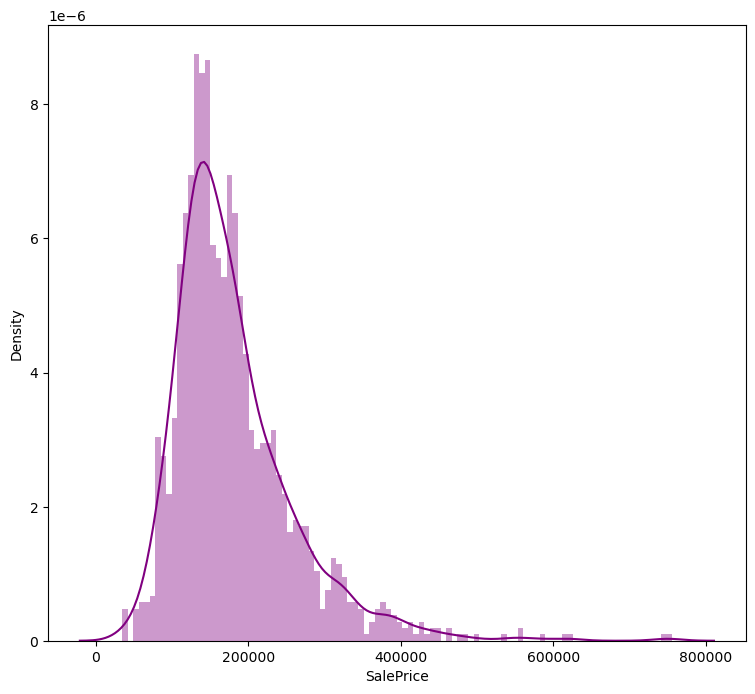

In [44]:
plt.figure(figsize=(9, 8))
sns.distplot(house_prices_df['SalePrice'], color='purple', bins=100, hist_kws={'alpha': 0.4})

* We normalize the target column

C:\Users\diego\AppData\Local\Temp\ipykernel_5292\2765382512.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='SalePrice', ylabel='Density'>

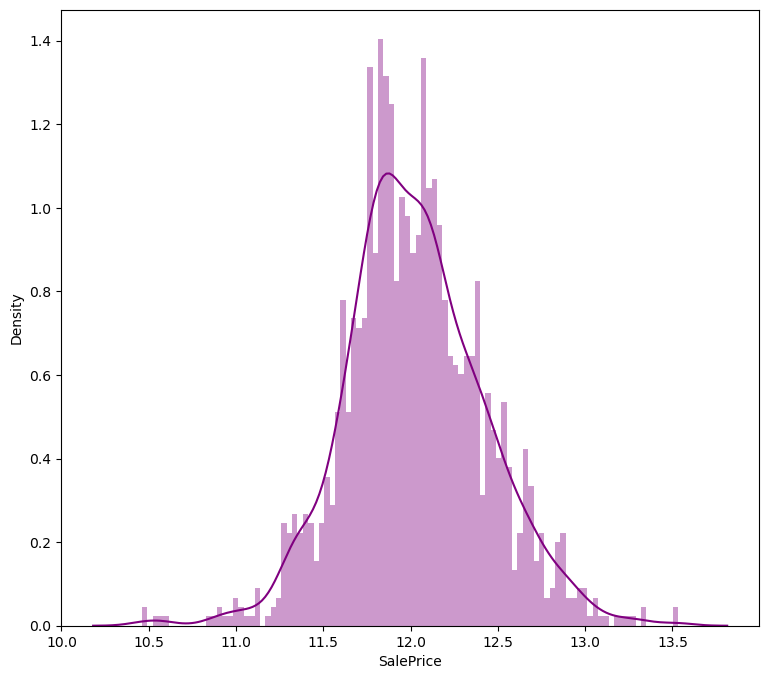

In [45]:
house_prices_df['SalePrice'] = np.log1p(house_prices_df['SalePrice'])

plt.figure(figsize=(9, 8))
sns.distplot(house_prices_df['SalePrice'], color='purple', bins=100, hist_kws={'alpha': 0.4})


* Now let's check the distribution of all numerical features

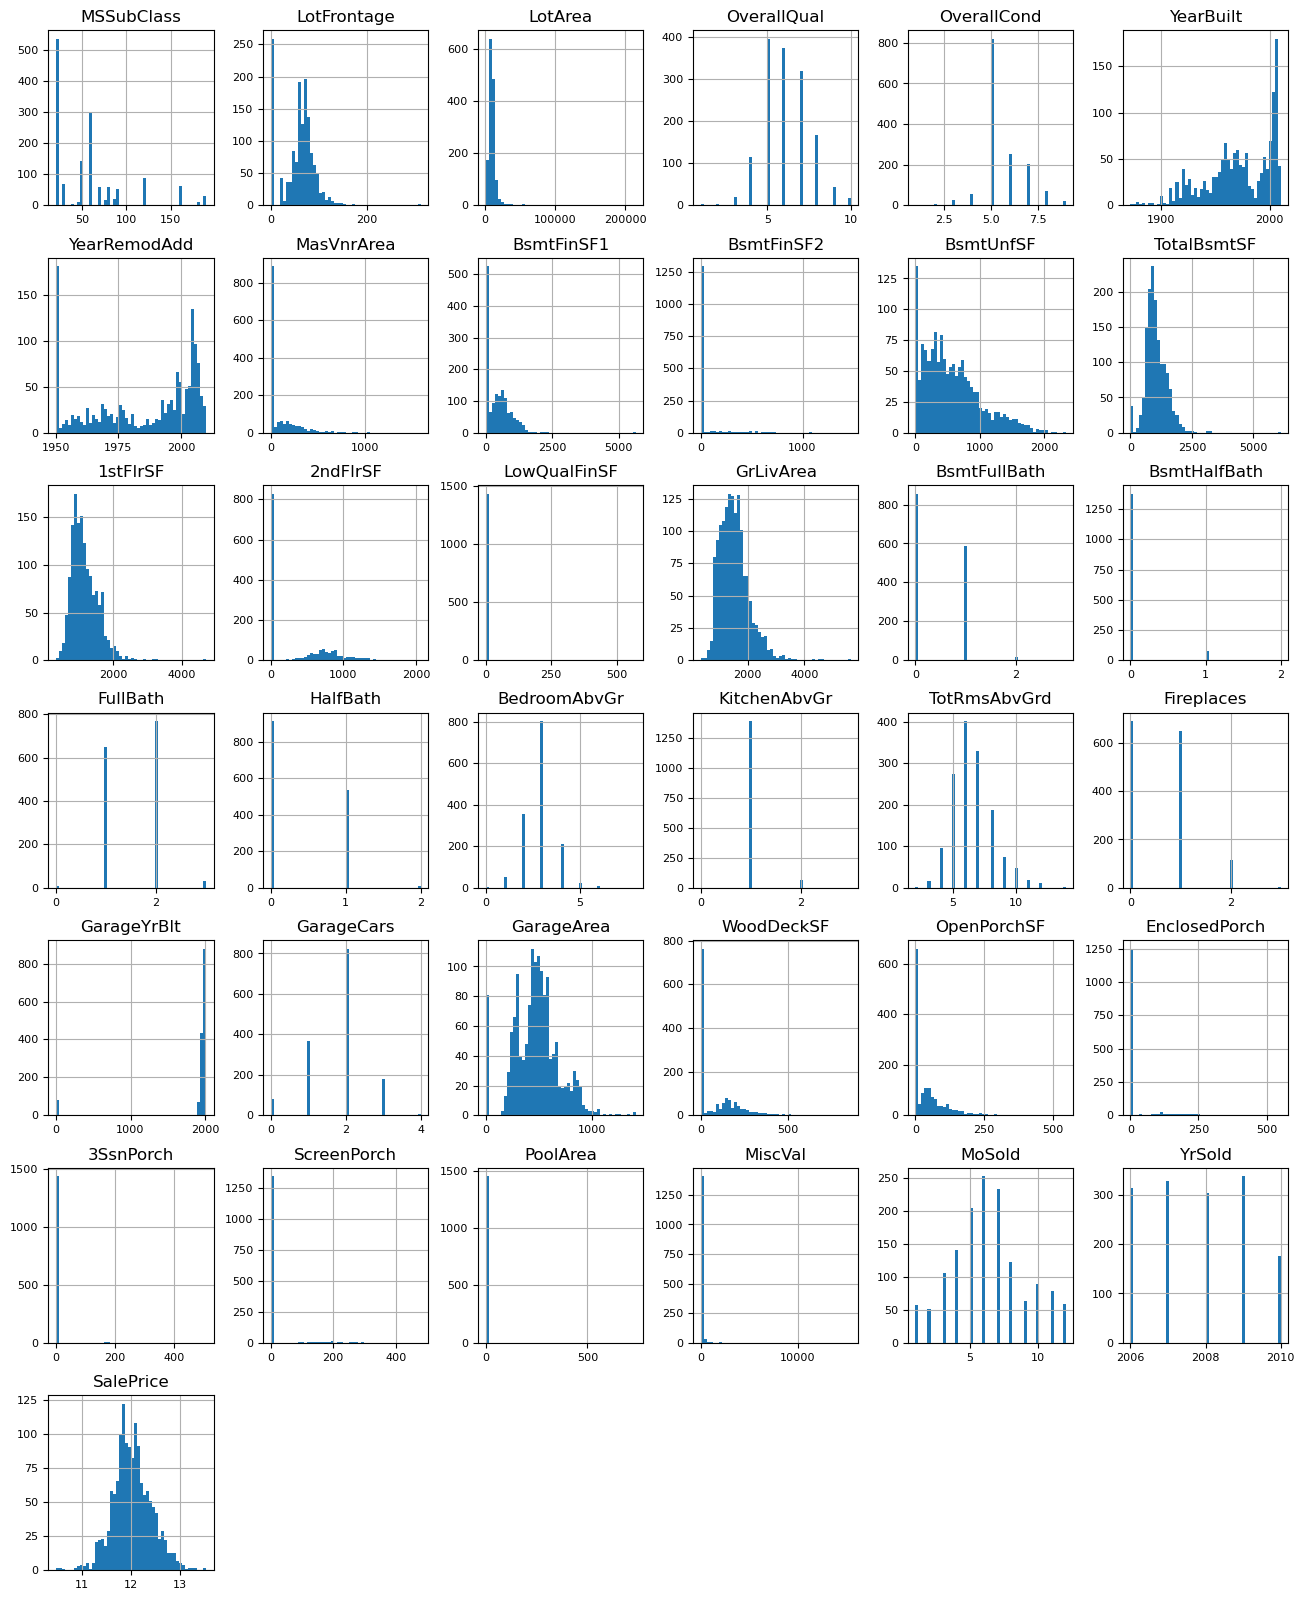

In [46]:
house_prices_num_df = house_prices_df[numerical_cols]

house_prices_num_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### **3° OLS Regressions**

* Prepare the data

In [47]:
house_prices_train_df, house_prices_test_df = train_test_split(house_prices_df, test_size=0.2, random_state=0)

In [48]:
house_prices_train_x_df = house_prices_train_df.drop('SalePrice', axis=1)
house_prices_train_y_df = house_prices_train_df['SalePrice']

house_prices_test_x_df = house_prices_test_df.drop('SalePrice', axis=1)
house_prices_test_y_df = house_prices_test_df['SalePrice']

* Linear Regression w/ OLS

In [49]:
# Instantiate the OLS Regressor
model_1_SGD = LinearRegression()

# Fit the model
model_1_SGD.fit(house_prices_train_x_df, house_prices_train_y_df)

# Predict the values
y_pred_1_OLS = model_1_SGD.predict(house_prices_test_x_df)

# Calculate the mean squared error & r2 score
mse_1_SGD = mean_squared_error(house_prices_test_y_df, y_pred_1_OLS)
r2_1_SGD = r2_score(house_prices_test_y_df, y_pred_1_OLS)

print(f'Mean Squared Error: {mse_1_SGD}')
print(f'R2 Score: {r2_1_SGD}')

Mean Squared Error: 0.05516062565312917
R2 Score: 0.635658322660274


C:\Users\diego\AppData\Local\Temp\ipykernel_5292\3461162339.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Predicted values', ylabel='Density'>

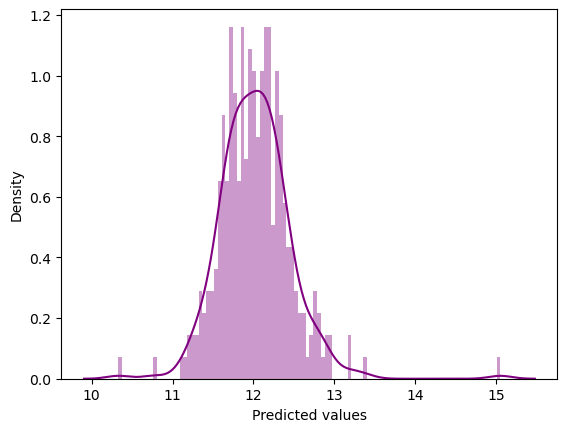

In [50]:
plt.xlabel('Predicted values')
sns.distplot(y_pred_1_OLS, color='purple', bins=100, hist_kws={'alpha': 0.4})

* 2° Degree OLS Regression 

In [51]:
# Create a PolynomialFeatures object with degree=2
poly_features_2_OLS = PolynomialFeatures(degree=2)

# Transform the input features
x_poly_2_OLS = poly_features_2_OLS.fit_transform(house_prices_train_x_df)

# Create an instance of the LinearRegression class
model_2_OLS = LinearRegression()

# Fit the model to your data using the `fit` method
model_2_OLS.fit(x_poly_2_OLS, house_prices_train_y_df)

x_test_2_OLS = poly_features_2_OLS.transform(house_prices_test_x_df)

# Use the model to predict y values
y_pred_2_OLS = model_2_OLS.predict(x_test_2_OLS)

# Calculate the mean squared error & the R^2 score
mse_2_OLS = mean_squared_error(house_prices_test_y_df, y_pred_2_OLS)
r2_2_OLS= r2_score(house_prices_test_y_df, y_pred_2_OLS)

print("Mean Squared Error: ", mse_2_OLS)
print("R^2 Score: ", r2_2_OLS)


Mean Squared Error:  111.80585955996203
R^2 Score:  -737.4893468150057


C:\Users\diego\AppData\Local\Temp\ipykernel_5292\210876966.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Predicted values', ylabel='Density'>

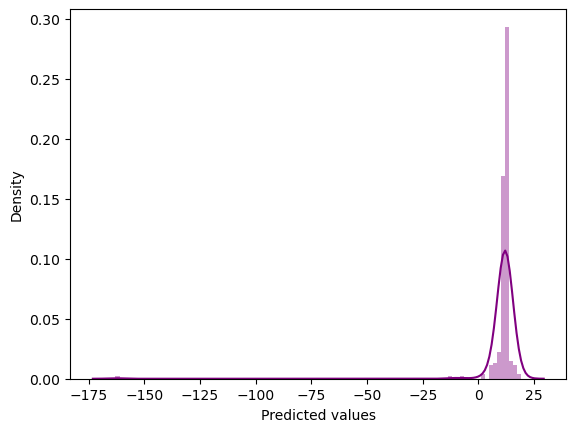

In [52]:
plt.xlabel('Predicted values')
sns.distplot(y_pred_2_OLS, color='purple', bins=100, hist_kws={'alpha': 0.4})

* 3° Degree OLS Regresion

In [53]:
# Create a PolynomialFeatures object with degree=3
poly_features_3_OLS = PolynomialFeatures(degree=3)

# Transform the input features
x_poly_3_OLS = poly_features_3_OLS.fit_transform(house_prices_train_x_df)

# Create an instance of the LinearRegression class
model_3_OLS = LinearRegression()

# Fit the model to your data using the `fit` method
model_3_OLS.fit(x_poly_3_OLS, house_prices_train_y_df)

x_test_3_OLS = poly_features_3_OLS.transform(house_prices_test_x_df)

# Use the model to predict y values
y_pred_3_OLS = model_3_OLS.predict(x_test_3_OLS)

# Calculate the mean squared error & the R^2 score
mse_3_OLS = mean_squared_error(house_prices_test_y_df, y_pred_3_OLS)
r2_3_OLS = r2_score(house_prices_test_y_df, y_pred_3_OLS)

print("Mean Squared Error: ", mse_3_OLS)
print("R^2 Score: ", r2_3_OLS)


Mean Squared Error:  21.528452542311722
R^2 Score:  -141.19767119972073


C:\Users\diego\AppData\Local\Temp\ipykernel_5292\2388397905.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Predicted values', ylabel='Density'>

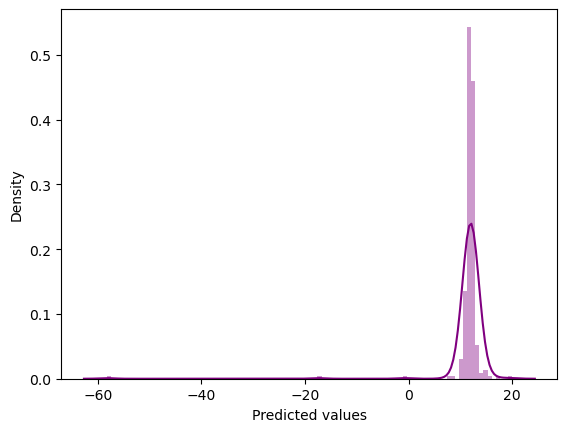

In [54]:
plt.xlabel('Predicted values')
sns.distplot(y_pred_3_OLS, color='purple', bins=100, hist_kws={'alpha': 0.4})

> We can see that only OLS Linear Regression is the only one that predict better, so now we are going to use **TensorFlow Random Forest**

#### **4° Random Forest**

In [55]:
# Initialize and train the RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf.fit(house_prices_train_x_df, house_prices_train_y_df)

# Evaluate the model
y_pred_rf = model_rf.predict(house_prices_test_x_df)
mse_rf = mean_squared_error(house_prices_test_y_df, y_pred_rf)
r2_rf = r2_score(house_prices_test_y_df, y_pred_rf)

print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

Mean Squared Error: 0.01842685735482581
R-squared: 0.8782886880403568


C:\Users\diego\AppData\Local\Temp\ipykernel_5292\1690002055.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Predicted values', ylabel='Density'>

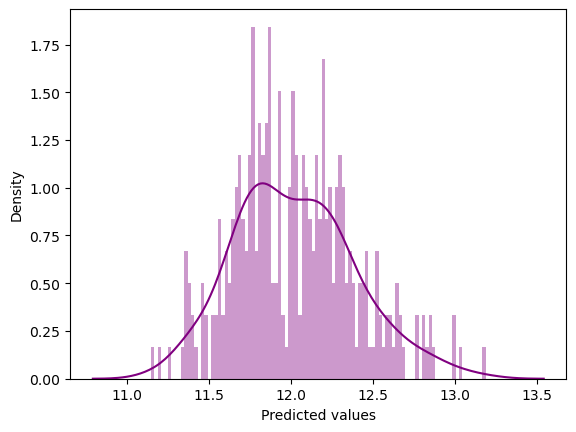

In [56]:
plt.xlabel('Predicted values')
sns.distplot(y_pred_rf, color='purple', bins=100, hist_kws={'alpha': 0.4})

#### **Evaluation all modells**

In [57]:
# Create a list of model names
model_names = ['OLS Linear Regression', '2° Degree OLS Regression', '3° Degree OLS Regression', 'Random Forest']

# Create a list of mean squared errors
mse_scores = [mse_1_SGD, mse_2_OLS, mse_3_OLS, mse_rf]

# Create a list of R-squared scores
r2_scores = [r2_1_SGD, r2_2_OLS, r2_3_OLS, r2_rf]

# Create a dataframe to store the scores
scores_df = pd.DataFrame({'Model': model_names, 'Mean Squared Error': mse_scores, 'R-squared': r2_scores})

# Sort the dataframe by mean squared error in ascending order
scores_df = scores_df.sort_values(by='Mean Squared Error')

# Print the scores dataframe
print(scores_df)

                      Model  Mean Squared Error   R-squared
3             Random Forest            0.018427    0.878289
0     OLS Linear Regression            0.055161    0.635658
2  3° Degree OLS Regression           21.528453 -141.197671
1  2° Degree OLS Regression          111.805860 -737.489347


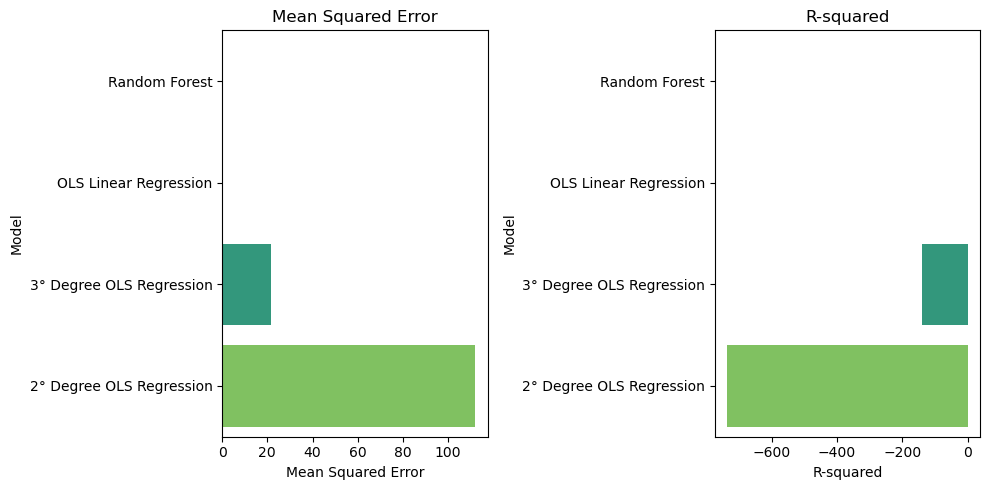

In [58]:
#visualizamos los resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Mean Squared Error', y='Model', data=scores_df, palette='viridis')
plt.title('Mean Squared Error')

plt.subplot(1, 2, 2)
sns.barplot(x='R-squared', y='Model', data=scores_df, palette='viridis')
plt.title('R-squared')

plt.tight_layout()
plt.show()
